# 단어 임베딩 단어 유추 평가

In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath('/notebooks/embedding'))
sys.path.insert(0, os.path.abspath('/notebooks/embedding/models'))
#sys.path.append('/notebooks/embedding')

os.chdir('/notebooks/embedding')

In [5]:
# wget https://github.com/dongjun-Lee/kor2vec/raw/master/test_dataset/kor_analogy_semantic.txt -P /notebooks/embedding/data/raw

In [6]:
eval_fname='/notebooks/embedding/data/raw/kor_analogy_semantic.txt'

In [7]:
from models.word_eval import WordEmbeddingEvaluator

## 코드 4-37 단어 유추 평가 수행 코드 (word2vec)

In [3]:
eval_fname='/notebooks/embedding/data/raw/kor_analogy_semantic.txt'

In [4]:
vecs_txt_fname='/notebooks/embedding/data/word-embeddings/word2vec/word2vec'
method='word2vec'
dim=100
tokenizer_name='mecab'

In [5]:
from models.word_eval import WordEmbeddingEvaluator

In [6]:
model = WordEmbeddingEvaluator(vecs_txt_fname=vecs_txt_fname, 
                               method=method, 
                               dim=dim, 
                               tokenizer_name=tokenizer_name)

In [7]:
model.word_analogy_test(eval_fname)

# of correct answer: 158 , # of data: 420 , # of errors: 0


## 코드 4-37 단어 유추 평가 수행 코드 (fasttext)

In [24]:
eval_fname='/notebooks/embedding/data/raw/kor_analogy_semantic.txt'

In [25]:
vecs_txt_fname='/notebooks/embedding/data/word-embeddings/fasttext/fasttext.vec'
vecs_bin_fname='/notebooks/embedding/data/word-embeddings/fasttext/fasttext.bin'
method='fasttext'
dim=100
tokenizer_name='mecab'

In [26]:
from models.word_eval import WordEmbeddingEvaluator

In [27]:
model = WordEmbeddingEvaluator(vecs_txt_fname=vecs_txt_fname, 
                               vecs_bin_fname=vecs_bin_fname, 
                               method=method, 
                               dim=dim, 
                               tokenizer_name=tokenizer_name)

In [28]:
model.word_analogy_test(eval_fname)

# of correct answer: 109 , # of data: 420 , # of errors: 0


## 코드 4-37 단어 유추 평가 수행 코드 (glove)

In [29]:
eval_fname='/notebooks/embedding/data/raw/kor_analogy_semantic.txt'

In [30]:
vecs_txt_fname='/notebooks/embedding/data/word-embeddings/glove/glove.txt'
method='glove'
dim=100
tokenizer_name='mecab'

In [31]:
from models.word_eval import WordEmbeddingEvaluator

In [32]:
model = WordEmbeddingEvaluator(vecs_txt_fname=vecs_txt_fname, method=method, dim=dim, tokenizer_name=tokenizer_name)

In [33]:
model.word_analogy_test(eval_fname)

# of correct answer: 158 , # of data: 420 , # of errors: 0


## 코드 4-37 단어 유추 평가 수행 코드 (swivel)

In [34]:
eval_fname='/notebooks/embedding/data/raw/kor_analogy_semantic.txt'

In [35]:
vecs_txt_fname='/notebooks/embedding/data/word-embeddings/swivel/row_embedding.tsv'
method='swivel'
dim=100
tokenizer_name='mecab'

In [36]:
from models.word_eval import WordEmbeddingEvaluator

In [37]:
model = WordEmbeddingEvaluator(vecs_txt_fname=vecs_txt_fname, 
                               method=method, 
                               dim=dim, 
                               tokenizer_name=tokenizer_name)

In [38]:
model.word_analogy_test(eval_fname)

# of correct answer: 141 , # of data: 420 , # of errors: 0


## 그림 4-18 단어 유추 평가 결과

In [43]:
%matplotlib inline

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.DataFrame(
    {"correct": [158, 109, 158, 141 ],
     "total": [420, 420, 420, 420 ]
    }, 
    index=["word2vec", "fasttext", "glove", "swivel"])

In [50]:
df.head()

,correct,total
word2vec,158,420
fasttext,109,420
glove,158,420
swivel,141,420


In [51]:
df['ratio'] = df['correct'] / df['total']
df

,correct,total,ratio
word2vec,158,420,0.376190
fasttext,109,420,0.259524
glove,158,420,0.376190
swivel,141,420,0.335714


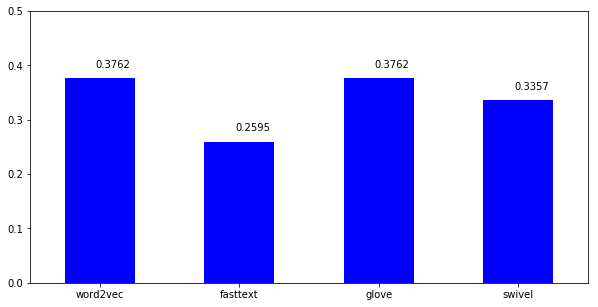

In [54]:
ax = df.plot(kind="bar", y=['ratio'], color=['b'], figsize=(10,5),rot=0)
ax.legend().set_visible(False)
plt.ylim(0,0.5)
x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.4f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))